<a href="https://colab.research.google.com/github/Priy-Sharma/Movie-Dataset-/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting dataset from drive

In [ ]:
from google.colab import drive
drive.mount('/content//drive')

Drive already mounted at /content//drive; to attempt to forcibly remount, call drive.mount("/content//drive", force_remount=True).


In [ ]:
movie_path = '/content/drive/MyDrive/Recommendation system/movies_metadata.csv'

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset

In [ ]:
df_credit = pd.read_csv(credit_path)

In [ ]:
df_movie = pd.read_csv(movie_path)

<ipython-input-7-c7b696e20e93>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie = pd.read_csv(movie_path)


In [ ]:
df_rating = pd.read_csv(rating_path)

For the analysis purpose we will focus only on the df_movie. Let's start with the data cleaning
# Data cleaning

In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

From the information it is clear that the movie data has 23 columns. So, Let's delet the column which are irrelevant. For the better visualization and to avoid confusion.

The irrelevant columns are: 'homepage', 'belongs_to_collection', 'overview', 'poster_path', 'production_countries', 'video', 'tagline', and 'imdb_id'

In [ ]:
df_movie.drop([ 'homepage', 'belongs_to_collection', 'overview', 'poster_path', 'production_countries', 'video', 'tagline', 'imdb_id'], axis =1, inplace = True)

### Data Cleaning: Converting Object Columns to Numeric

In this section, we will identify and address issues with the data types of certain columns. Specifically, we will focus on the columns 'budget', 'id', and 'popularity', which are currently of type 'object' but should be numeric (int or float). Correcting these data types is essential for accurate analysis and visualization.

In [ ]:
movie_copy_1 = df_movie.copy()

In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45466 non-null  object 
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   original_language     45455 non-null  object 
 5   original_title        45466 non-null  object 
 6   popularity            45461 non-null  object 
 7   production_companies  45463 non-null  object 
 8   release_date          45379 non-null  object 
 9   revenue               45460 non-null  float64
 10  runtime               45203 non-null  float64
 11  spoken_languages      45460 non-null  object 
 12  status                45379 non-null  object 
 13  title                 45460 non-null  object 
 14  vote_average          45460 non-null  float64
 15  vote_count         

In [ ]:
# Examine Unique Values in Columns:
columns_to_change_dtype = ['budget', 'id', 'popularity']
for column in columns_to_change_dtype:
  print(f"The unique value in {column} are: {movie_copy_1[column].unique()}")
  print("-" *10)

The unique value in budget are: ['30000000' '65000000' '0' ... '3417000' '25868826' '1254040']
----------
The unique value in id are: ['862' '8844' '15602' ... '67758' '227506' '461257']
----------
The unique value in popularity are: [21.946943 17.015539 11.7129 ... '0.903007' '0.003503' '0.163015']
----------


 The unique values are extracted to identify any non-numeric entries present in the columns. However, due to the large number of records, the above method may not reveal all non-numeric values.

To ensure we capture all non-numeric values, we will apply the following method:


In [ ]:
def is_float(x):
  """
    Check if a value can be converted to a float.

    This function attempts to convert a value to a float.
    If the conversion is successful, it returns True.
    Otherwise, it returns False.

    Parameters:
    x (any): The value to be checked.

    Returns:
    bool: True if x can be converted to float, False otherwise.
    """
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
movie_copy_1[~movie_copy_1['budget'].apply(is_float)]

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
19730,- Written by Ørnås,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",NaN,False,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Beware Of Frost Bites,False,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie_copy_1[~movie_copy_1['popularity'].apply(is_float)]

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
35587,Avalanche Sharks tells the story of a bikini ...,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Beware Of Frost Bites,False,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie_copy_1[~movie_copy_1['id'].apply(is_float)]

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
19730,- Written by Ørnås,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",NaN,False,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Beware Of Frost Bites,False,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 'budget', 'id', and 'popularity' columns contain irrelevant records at row numbers 19730, 29503, and 35587. We will delete these records by their index numbers to ensure data integrity.


In [ ]:
movie_copy_1.drop([19730, 29503, 35587], inplace =True)

In [ ]:
## Conversion to numeric column

movie_copy_1[['budget',  'popularity']] = movie_copy_1[['budget', 'popularity']].astype(float)
movie_copy_1['id'] = movie_copy_1['id'].astype(int)

# Checking for the nan values in the dataset

In [ ]:
movie_copy_1.isna().sum()

adult                     0
budget                    0
genres                    0
id                        0
original_language        11
original_title            0
popularity                3
production_companies      3
release_date             87
revenue                   3
runtime                 260
spoken_languages          3
status                   84
title                     3
vote_average              3
vote_count                3
dtype: int64

In [ ]:
movie_copy_1.shape

(45463, 16)

The nan values present in the dataset is less than 1% so I can drop the records of nan.

In [ ]:
movie_copy_1.dropna()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,False,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,False,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,en,Robin Hood,5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Robin Hood,5.7,26.0
45462,False,0.0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,Siglo ng Pagluluwal,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0
45463,False,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,Betrayal,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0
45464,False,0.0,[],227506,en,Satana likuyushchiy,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0


In [ ]:
# Make the copy
movie_copy_2 = movie_copy_1.copy()
print(movie_copy_2.shape)

(45463, 16)


In [ ]:
movie_copy_2.head(10)

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,False,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,False,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0
5,False,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,Heat,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886.0
6,False,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,en,Sabrina,6.677277,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Sabrina,6.2,141.0
7,False,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,en,Tom and Huck,2.561161,"[{'name': 'Walt Disney Pictures', 'id': 2}]",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Tom and Huck,5.4,45.0
8,False,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,Sudden Death,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death,5.5,174.0
9,False,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,en,GoldenEye,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,GoldenEye,6.6,1194.0


Upon examination of the data, it appears that a significant portion of records reflect zero values for both budget and revenue. This scenario may indicate missing  data. Therefore, we will remove records where both budget and revenue are zero.

In [ ]:
# Drop the records by index
zero_index = movie_copy_2[(movie_copy_2['revenue'] == 0) | (movie_copy_2['budget'] == 0)].index
movie_copy_2.drop(zero_index, inplace = True)

In [ ]:
print(f"The shape of dataframe is: {movie_copy_2.shape}")
movie_copy_2.head()


The shape of dataframe is: (5381, 16)


,adult,budget,genres,id,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
5,False,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,Heat,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886.0
8,False,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,Sudden Death,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death,5.5,174.0


The columns 'original_language' and 'spoken_languages', as well as the columns 'original_title' and 'title', contain the same information. Therefore, I will retain most efficient column from each of these pairs to avoid redundancy

In [ ]:
movie_copy_2.drop(columns= ['spoken_languages', 'original_title'], inplace = True)

In [ ]:
movie_copy_2.head()

,adult,budget,genres,id,original_language,popularity,production_companies,release_date,revenue,runtime,status,title,vote_average,vote_count
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
5,False,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0
8,False,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0


some of the records of the columns 'produduction_companies' and 'genres' contains the empty list.

In [ ]:
movie_copy_2[movie_copy_2['production_companies'] == '[]'].shape

(181, 14)

In [ ]:
movie_copy_2[movie_copy_2['genres'] == '[]'].shape

(12, 14)

The data contained within the 'production_companies' and 'genres' columns currently exhibits inconsistencies in its formatting. To address this, we will leverage the literal_eval function to extract the embedded information.

Focusing on the 'genres' column, our objective is to isolate the two most prevalent genres associated with each record.

Similarly, for the 'production_companies' column, we aim to extract solely the primary production company for each record.

In [ ]:
movie_copy_3 = movie_copy_2.copy()

## Literal_eval function only extracts the string, e.g

## Example of literal_eval with a list
list_str = "[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

list_obj = ast.literal_eval(list_str)
print(list_obj)

 Output: [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]



In [ ]:
import ast
def str_to_list(str):
    return ast.literal_eval(str)

In [ ]:
movie_copy_3['genres'] = movie_copy_3['genres'].apply(str_to_list)

In [ ]:
def extract_first_genre_name(genres):
    if genres and len(genres) > 0:
        return genres[0]['name']
    return None

In [ ]:
def extract_second_genre_name(genres):
    if genres and len(genres) > 1:
        return genres[1]['name']
    return None

In [ ]:
movie_copy_3['first_genre'] = movie_copy_3['genres'].apply(extract_first_genre_name)
movie_copy_3['second_genre'] = movie_copy_3['genres'].apply(extract_second_genre_name)

In [ ]:
movie_copy_3['production_companies'] = movie_copy_3['production_companies'].apply(str_to_list)

In [ ]:
def extract_production_company(production_company):
  if production_company and len(production_company) >0:
    return production_company[0]['name']

In [ ]:
movie_copy_3['production_company'] = movie_copy_3['production_companies'].apply(extract_production_company)

In [ ]:
# After extracting the desired columns we will delet the original columns.
movie_copy_3.drop(columns = ['production_companies', 'genres'], inplace = True)

In [ ]:
movie_copy_4 = movie_copy_3.copy()

In [ ]:
movie_copy_4.isna().sum()

adult                   0
budget                  0
id                      0
original_language       0
popularity              0
release_date            0
revenue                 0
runtime                 1
status                  0
title                   0
vote_average            0
vote_count              0
first_genre            12
second_genre          951
production_company    181
dtype: int64

The new dataframe, movie_copy_4, now contains 'NaN' values for the columns 'production_company', 'first_genre', and 'second_genre'. This is because the previously existing empty lists in the 'production_companies' and 'genres' columns have been converted to 'NaN' values

# Filling the 'NAN' values present in the 'production_company' column with the help of random forest.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


# Separate rows with and without missing production_company
train_data = movie_copy_4.dropna(subset=['production_company'])
missing_data = movie_copy_4[movie_copy_4['production_company'].isnull()]

# Feature encoding
le_genre = LabelEncoder()
le_company = LabelEncoder()

# Encode 'first_genre' for both train and missing data
train_data['first_genre'] = le_genre.fit_transform(train_data['first_genre'])
missing_data['first_genre'] = le_genre.transform(missing_data['first_genre'])

# Encode 'production_company' for train data
train_data['production_company'] = le_company.fit_transform(train_data['production_company'])

# Define features and target variable
features = ['budget', 'vote_average', 'popularity', 'first_genre', 'runtime']
X_train = train_data[features]
y_train = train_data['production_company']

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict missing values
X_missing = missing_data[features]

# Drop rows with NaN values in X_missing to match prediction requirements
X_missing = X_missing.dropna()

# Predict the production companies for the missing data
predicted_companies = clf.predict(X_missing)

# Convert predicted labels back to original company names
predicted_companies = le_company.inverse_transform(predicted_companies)

# Ensure the correct indices for filling missing values
indices_to_fill = missing_data.index.intersection(X_missing.index)

# Fill the missing values in the original DataFrame
movie_copy_4.loc[indices_to_fill, 'production_company'] = predicted_companies

# Display the updated dataset
print(movie_copy_4)



<ipython-input-43-9209c2bda399>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['first_genre'] = le_genre.fit_transform(train_data['first_genre'])
<ipython-input-43-9209c2bda399>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['first_genre'] = le_genre.transform(missing_data['first_genre'])
<ipython-input-43-9209c2bda399>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

       adult      budget      id original_language  popularity release_date  \
0      False  30000000.0     862                en   21.946943   1995-10-30   
1      False  65000000.0    8844                en   17.015539   1995-12-15   
3      False  16000000.0   31357                en    3.859495   1995-12-22   
5      False  60000000.0     949                en   17.924927   1995-12-15   
8      False  35000000.0    9091                en    5.231580   1995-12-22   
...      ...         ...     ...               ...         ...          ...   
45250  False  12000000.0   24049                ta    1.323587   2007-06-14   
45399  False    750000.0  280422                ru    0.201582   2014-06-05   
45409  False    800000.0   62757                en    0.903061   2006-11-23   
45412  False   2000000.0   63281                en    0.121844   2010-09-30   
45422  False   5000000.0   63898                ru    0.039793   2007-09-06   

           revenue  runtime    status              

In [ ]:
movie_copy_4.loc[45399, 'production_company'] = 'Lunapark'

In [ ]:
# The 'runtime' column contains one 'NaN' value and the 'first_genre' column contains twelve 'NaN' values. Therefore, we will proceed to drop these rows from the dataframe.

movie_copy_4.dropna(subset = ['first_genre', 'runtime'], inplace = True)

The 'second_genre' column contains a significant number of 'NAN' values. This is due to many movies being classified under a single genre. To address this, I will replace the 'NAN' values in the 'second_genre' column with the corresponding 'first_genre' names

In [ ]:
movie_copy_4 = movie_copy_4.ffill(axis = 1)

In [ ]:
cleaned_movie_data = '/content/drive/MyDrive/Recommendation system/cleaned_movie_data.csv'

In [ ]:
# Assuming movie_copy_4 is your DataFrame
movie_copy_4.to_csv(cleaned_movie_data,index=False)

# EDA : Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
cleaned_movie_data = '/content/drive/MyDrive/Recommendation system/cleaned_movie_data.csv'

In [ ]:
movies_dataframe = pd.read_csv(cleaned_movie_data)

In [ ]:
movies_dataframe.head()

,adult,budget,id,original_language,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,first_genre,second_genre,production_company
0,False,30000000.0,862,en,21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,Animation,Comedy,Pixar Animation Studios
1,False,65000000.0,8844,en,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,Adventure,Fantasy,TriStar Pictures
2,False,16000000.0,31357,en,3.859495,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,Comedy,Drama,Twentieth Century Fox Film Corporation
3,False,60000000.0,949,en,17.924927,1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0,Action,Crime,Regency Enterprises
4,False,35000000.0,9091,en,5.231580,1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0,Action,Adventure,Universal Pictures


In [ ]:
print(movies_dataframe.isna().sum())
movies_dataframe.shape

adult                 0
budget                0
id                    0
original_language     0
popularity            0
release_date          0
revenue               0
runtime               0
status                0
title                 0
vote_average          0
vote_count            0
first_genre           0
second_genre          0
production_company    0
dtype: int64


(5368, 15)

In [ ]:
movies_dataframe.columns

Index(['adult', 'budget', 'id', 'original_language', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'first_genre', 'second_genre', 'production_company'],
      dtype='object')

## Now, We will make the new column named as 'profit'

In [ ]:
# making new column 'profit'
movies_dataframe['budget'] = movies_dataframe['budget'].apply(lambda x: round(x/10000000, 2))
movies_dataframe['revenue'] = movies_dataframe['revenue'].apply(lambda x: round(x/10000000, 2))
movies_dataframe['profit'] = (movies_dataframe['revenue'] - movies_dataframe['budget'])

# Renaming the columns
movies_dataframe.rename(columns = {'revenue' : 'revenue_in_cr', 'budget': 'budget_in_cr', 'profit': 'profit_in_cr'}, inplace = True)

# Creating a DataFrame that will contain the following columns:
'primary_genre': The main genre of the movie.


'average_popularity': The average popularity gained by movies of the primary genre.


'movie_count': The total number of movies made in the primary genre.


'average_budget': The average budget required to make a movie of the primary genre, in crores


In [ ]:
# Popular genre based on the popularity score
genre_popularity = movies_dataframe.groupby('first_genre').agg({'popularity': ['mean'], 'title':['count'], 'budget_in_cr' :['mean']}).reset_index()
genre_popularity.columns = ['primary_genre', 'average_popularity', 'No. of movies', 'Average_budget']
genre_popularity.rename(columns = {'No. of movies' : 'movie_count'}, inplace = True)
genre_popularity

,primary_genre,average_popularity,movie_count,Average_budget
0,Action,11.581158,961,4.551831
1,Adventure,12.677201,416,6.302524
2,Animation,11.634938,146,6.629932
3,Comedy,7.679385,1067,2.160731
4,Crime,8.936833,267,2.176966
5,Documentary,4.593775,48,0.391042
6,Drama,8.373891,1315,1.976251
7,Family,25.812090,55,5.927273
8,Fantasy,10.690946,140,4.719071
9,Foreign,0.515526,4,0.207500


## Creating a dataframe that will contain:

'primary_genre': Main genre of the movie.

'Secondary_genre": Main supporting genre for the primary genre'

'movie_count(secondary_genre)': Number of movies made considering the firsr and second genre.

"Out of 961 movies made with action as the primary genre, 283 have adventure as the top secondary genre."

In [ ]:
genre_counts = movies_dataframe.groupby(['first_genre', 'second_genre']).size().reset_index(name='count')
max_genres = genre_counts.loc[genre_counts.groupby('first_genre')['count'].idxmax()]
max_genres.columns = ['primary_genre', 'secondary_genre', 'movie_count(Seconadry_genre)']
max_genres

,primary_genre,secondary_genre,movie_count(Seconadry_genre)
1,Action,Adventure,283
17,Adventure,Action,96
34,Animation,Comedy,49
46,Comedy,Drama,322
62,Crime,Drama,179
70,Documentary,Documentary,33
81,Drama,Drama,381
96,Family,Animation,17
105,Fantasy,Drama,29
114,Foreign,Comedy,1


## Join of two dataframes
We will perform inner join to join the  'genre_popularity' dataframe with 'max_genres' dataframe.

In [ ]:
genre_dataframe = pd.merge(max_genres, genre_popularity, on = 'primary_genre', how = 'inner' )
genre_dataframe.head()

,primary_genre,secondary_genre,movie_count(Seconadry_genre),average_popularity,movie_count,Average_budget
0,Action,Adventure,283,11.581158,961,4.551831
1,Adventure,Action,96,12.677201,416,6.302524
2,Animation,Comedy,49,11.634938,146,6.629932
3,Comedy,Drama,322,7.679385,1067,2.160731
4,Crime,Drama,179,8.936833,267,2.176966


##  Popular genre based on the average popularity score

In [ ]:
# Popular genre based on the average popularity score
genre_popularity_sort = genre_dataframe.sort_values("average_popularity", ascending = False)
fig1 = px.bar(genre_popularity_sort, x = 'primary_genre', y = 'average_popularity', color = 'average_popularity',
              title = 'Popular Genres based on Popularity Score',
              hover_data = ['secondary_genre','movie_count(Seconadry_genre)'],
              color_continuous_scale='Agsunset')

fig1.update_layout(xaxis_title = 'Primary Genre of the movie',
                   yaxis_title = 'Popularity of the movies',
                   coloraxis_showscale = False)


## Key Insights for Popular Genre Based on Popularity Score:
1. Family is the most popular genre based on the average popularity score, followed by Science Fiction and Adventure.


2. The popularity score for the Family genre is around 26. People love the Family genre, especially when Animation is the top supporting genre (Secondary Genre).


## Movie count by Genre: A Cinematic Breakdown


In [ ]:
# Movie Count by Genre: A Cinematic Breakdown

genre_title_sort = genre_popularity.sort_values("movie_count", ascending = False)
fig1 = px.bar(genre_title_sort, x = 'primary_genre', y = 'movie_count', color = 'movie_count',
              title = 'Movie Count by Genre: A Cinematic Breakdown',
              hover_data = ['Average_budget'],
              color_continuous_scale='Agsunset')

fig1.update_layout(xaxis_title = 'Primary Genre of the movie',
                   yaxis_title = 'Count of Movies',
                   coloraxis_showscale = False)

##  Key Insights for the 'Movie count by Genre: A Cinematic Breakdown1

1. Although Family, Science Fiction, and Adventure are popular genres, the maximum number of movies are made in the Drama, Comedy, and Action genres.

2. One reason for the lower count of movies in the popular genres may be their high budget

## Addition of new column 'Year'

From the 'released_date' of movies_dataframe we will extract the new column as year.

In [ ]:
movies_dataframe['year'] = movies_dataframe['release_date'].apply(lambda x: x.split("-")[0])
movies_dataframe['year'] = movies_dataframe['year'].astype(int)

## 'bud_rev' dataframe will include:
'year': Release Year for the movie

'budget_in_cr': Average movies budget for that particular year

'revenue_in_cr': Averege revenue genereted by the movies for that particular year.

In [ ]:
bud_rev = movies_dataframe.groupby('year').agg({'budget_in_cr' : ['mean'], 'revenue_in_cr': ['mean']}).reset_index()

In [ ]:
bud_rev.head()

,year,budget_in_cr,revenue_in_cr
,,mean,mean
0,1915,0.005,0.555
1,1916,0.020,0.800
2,1918,0.030,0.800
3,1921,0.030,0.250
4,1922,0.110,0.040


## From 1960 movies got popularity and people start seek for the movies for the entertainment.
We will keep the records from 'bud_rev' dataframe from the year 1960 and will named dataframe as 'bud_rev_1960'

In [ ]:
bud_rev_1960 = bud_rev[bud_rev['year'] >= 1960]

(array([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010,
        2015]),
 [Text(1960, 0, '1960'),
  Text(1965, 0, '1965'),
  Text(1970, 0, '1970'),
  Text(1975, 0, '1975'),
  Text(1980, 0, '1980'),
  Text(1985, 0, '1985'),
  Text(1990, 0, '1990'),
  Text(1995, 0, '1995'),
  Text(2000, 0, '2000'),
  Text(2005, 0, '2005'),
  Text(2010, 0, '2010'),
  Text(2015, 0, '2015')])

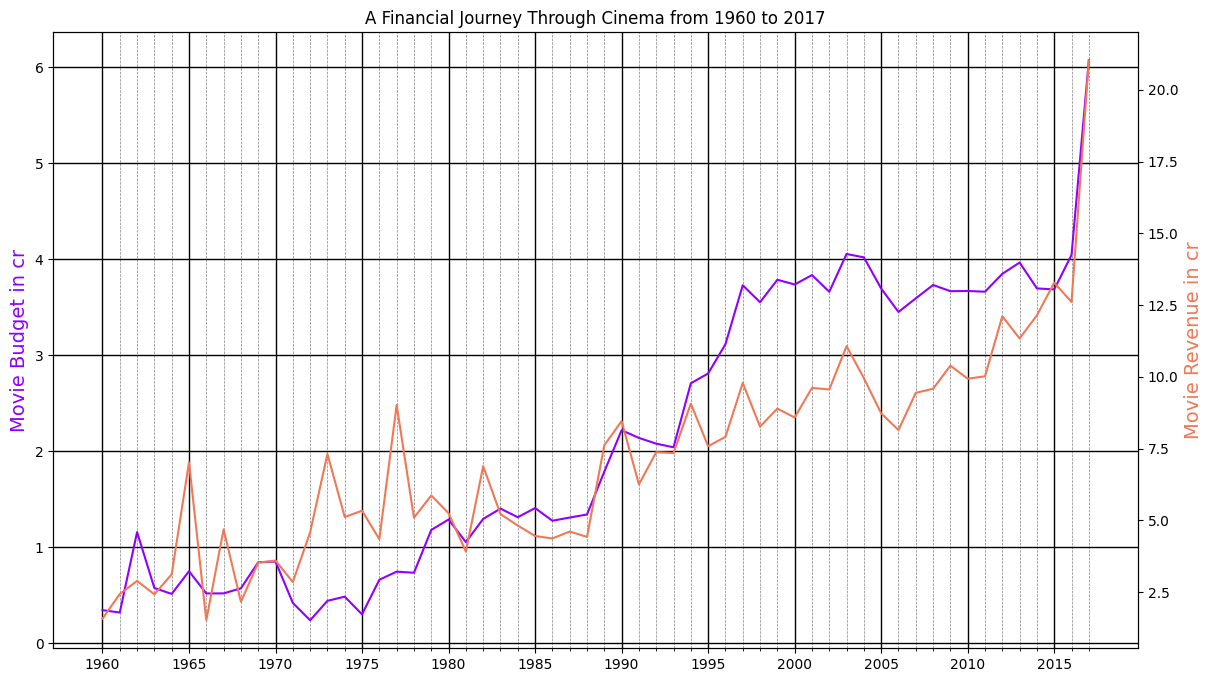

In [ ]:
import numpy as np
plt.figure(figsize = (14,8))
plt.title("A Financial Journey Through Cinema from 1960 to 2017")
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("Movie Budget in cr", fontsize =14, color = '#8F00FF')
ax2.set_ylabel("Movie Revenue in cr", fontsize = 14, color = '#F07857')

ax1.plot(bud_rev_1960['year'], bud_rev_1960['budget_in_cr'], color = '#8F00FF')
ax2.plot(bud_rev_1960['year'], bud_rev_1960['revenue_in_cr'], color = '#F07857')

# Set major and minor ticks
major_ticks = np.arange(1960, 2018, 5)
minor_ticks = np.arange(1960, 2018, 1)

ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)

# Formatting for better visualization
ax1.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
ax1.grid(which='major', color='black', linestyle='-', linewidth=1)

plt.xticks(rotation =45)

## Key insights for 'A Financial Journey Through Cinema from 1960 to 2017' graph:
1. Staggering Growth: Both the budget and revenue of movies have shown significant growth over the years.


2. 1960-1970: From 1960 to 1970, the budget and revenue lines coincide, indicating that movies during this decade were either not intended to be profitable or were unable to generate profit.


3. 1992-2015 Profit Increase: From 1992 to 2015, movies started generating higher profit ratios as the budgets were significantly lower than the revenues.


4. 2016 Growth: The year 2016 shows exceptional growth in both movie budgets and revenues.







Creating the graph 'A Financial Journey Through Cinema from 1920 to 2017' using the rolling average method and comparing it with the period from 1960 to 2017."

(array([1920., 1940., 1960., 1980., 2000., 2020.]),
 [Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020')])

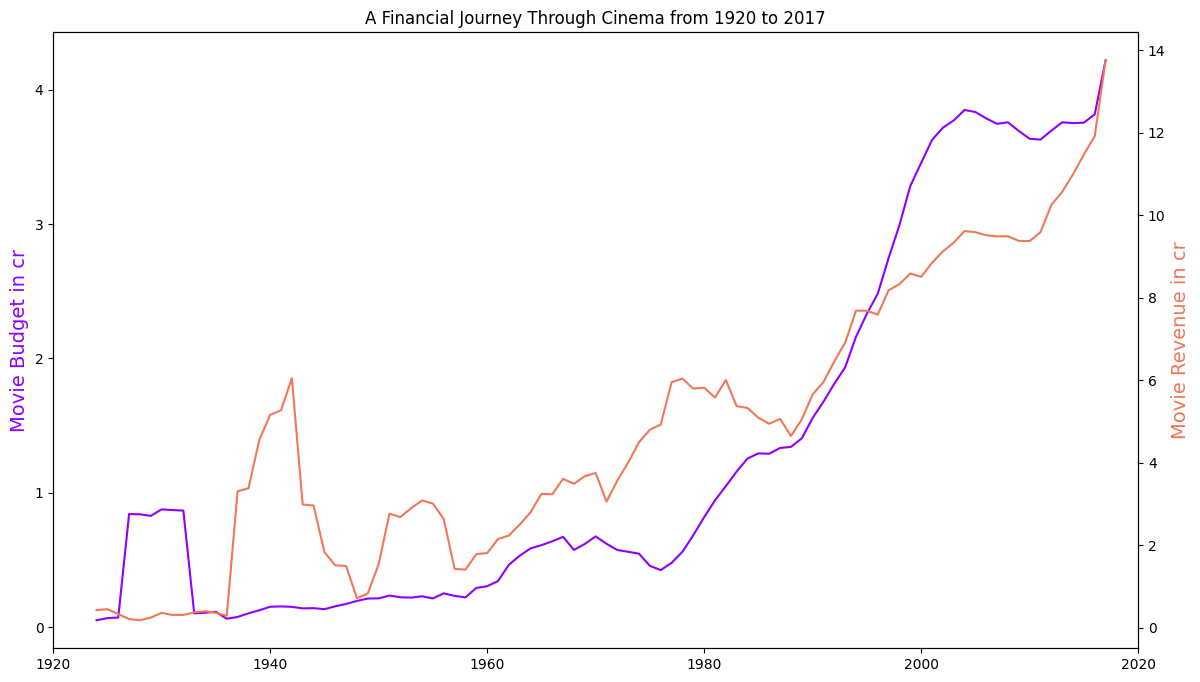

In [ ]:
roll_df = bud_rev[['budget_in_cr', 'revenue_in_cr']].rolling(window =6).mean()
plt.figure(figsize = (14,8))
plt.title("A Financial Journey Through Cinema from 1920 to 2017")
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("Movie Budget in cr", fontsize =14, color = '#8F00FF')
ax2.set_ylabel("Movie Revenue in cr", fontsize = 14, color = '#F07857')

ax1.plot(bud_rev['year'], roll_df['budget_in_cr'], color = '#8F00FF')
ax2.plot(bud_rev['year'], roll_df['revenue_in_cr'], color = '#F07857')

# Set x-axis limit
ax1.set_xlim(1920, 2020)

plt.xticks(rotation =45)

In [ ]:
fig_box = px.box(movies_dataframe, x='first_genre', y='profit_in_cr', title="Deep inside the Profit Based on First Genre")

fig_box.update_layout(
    title=dict(
        text="Exploring Profit Based on First Genre",
        x=0.5,  # This centers the title
        xanchor='center',
        font=dict(
            size=20,
            color = 'Black'
        )))

fig_box.show()

## Key insight for 'Exploring Profit Based on First Genre' graph:
1. The Animation genre has a median profit of the 8.1 crore.

2. Some Of the movies of action genre made profit greater than 100 crore.

3. Profits made by the genres 'TV movies' and 'Foreign' is the minimum.

## High Profit Top 10 Movies

In [ ]:
# Top 10 movies for which profit is maximum.
top_10_movies = movies_dataframe.sort_values(by = 'profit_in_cr', ascending= False)[:10]
figure = px.bar(top_10_movies, x = 'title', y =  'profit_in_cr', hover_data = ['budget_in_cr', 'first_genre', 'production_company'])
figure.update_layout(
    xaxis_title = 'Movie name',
    yaxis_title = 'Average vote',
    title_text = "Top 10 Most Profitable Movies"
)
figure.show()


## Key insights for 'Top 10 Most Profitable Movies':
1. "Out of 10 movies, 5 are of the 'Action' genre. (Just hover over the bars)"

2. "The movie 'Avatar' made a profit of more than 250 crores, with a production budget of only 23.7 crores."

3. "The second most profitable movie is from Star Wars, with profits exceeding 180 crores."

## The Following dataframe includes columns as follows:
'production_company': Name of the production company
'movie_count': Number of movies produced by the production companies.

'average_budget': The average money spend by the production companies while making the company.

'average_revenue': The average revenue earned by the production company.

'average_profit': Average profit made by the production companies.


In [ ]:
pro_com = movies_dataframe.groupby('production_company').agg({'title' :['count'], 'budget_in_cr': ['mean'], 'revenue_in_cr': ['mean'], 'profit_in_cr': ['mean']}).reset_index()
pro_com.columns = ['production_company', 'movie_count', 'average_budget', 'average_revenue', 'average_profit']
top_15_company = pro_com.sort_values(by ='movie_count', ascending = False)[:15].reset_index()
top_15_company

,index,production_company,movie_count,average_budget,average_revenue,average_profit
0,876,Paramount Pictures,343,4.419271,13.226764,8.807493
1,1251,Universal Pictures,334,3.939551,13.158054,9.218503
2,1234,Twentieth Century Fox Film Corporation,256,3.582773,11.664805,8.082031
3,258,Columbia Pictures,211,5.623270,14.802796,9.179526
4,800,New Line Cinema,166,3.290241,9.434157,6.143916
5,1287,Walt Disney Pictures,131,9.214580,29.983740,20.769160
6,1291,Warner Bros.,121,2.929339,9.318512,6.389174
7,749,Metro-Goldwyn-Mayer (MGM),99,0.895051,1.539495,0.644444
8,768,Miramax Films,89,2.168539,6.105843,3.937303
9,1245,United Artists,89,1.381910,6.212247,4.830337


# Profit made by the production companies in crores

In [ ]:
import plotly.graph_objects as go
# Create the bar chart
fig = go.Figure(
    data=go.Bar(
        x=top_15_company.index,
        y=top_15_company['movie_count'],
        name="Movie count",
        marker=dict(color='#8F00FF'),
        hovertemplate=(
            "Company: %{customdata[2]}<br>"
            "Movie Count: %{y}<br>"
            "Average Budget: %{customdata[0]} crores<br>"
            "Average Revenue: %{customdata[1]} crores"
        ),
        customdata=list(zip(top_15_company['average_budget'], top_15_company['average_revenue'], top_15_company['production_company']))
    )
)

# Add the scatter plot
fig.add_trace(
    go.Scatter(
        x=top_15_company.index,
        y=top_15_company['average_profit'],
        yaxis="y2",
        name="Profit made by company in crores",
        marker=dict(color='#F07857'),

    )
)

# Update layout
fig.update_layout(
    title='Movie Count and Profit Analysis',
    legend=dict(orientation="h"),
    yaxis=dict(
        title=dict(text="Movie count"),
        side="left",

    ),
    yaxis2=dict(
        title=dict(text="Profit made by company in crores"),
        side="right",
        overlaying="y",
        tickmode="sync",

    ),
    hovermode='x'
)

fig.show()


Just by hovering over the graph, we can observe that the numbers on the x-axis correspond to production company names. Given the lengthy names of the production companies, numerical representations are used instead.

1. Paramount Pictures emerges as the production company with the highest film count, followed closely by Universal Pictures.


2. Despite Paramount Pictures leading in the number of movies produced, Walt Disney Pictures stands out for generating the highest profit. This could be attributed to Walt Disney Pictures allocating a higher budget to movie production compared to other companies. (Hover over bars to view average budget, revenue, movie count, and production company name.)

## Number of Movies Released Per Year Over Time

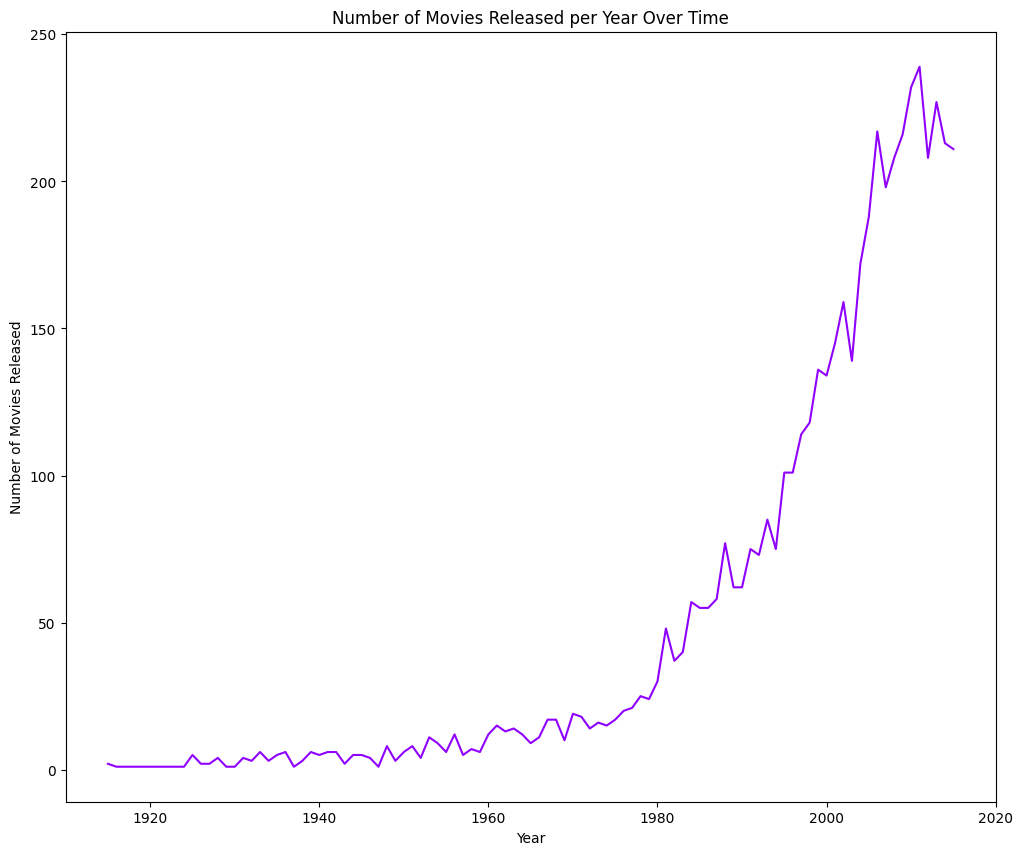

In [ ]:
# How does the number of movies released per year change over time?
plt.figure(figsize = (12,10))
movie_count = movies_dataframe.groupby('year')['title'].count().reset_index()

plt.plot(movie_count.year[:97], movie_count.title[:97], color ='#8F00FF' )

plt.xlabel('Year')
plt.ylabel('Number of Movies Released')

plt.title('Number of Movies Released per Year Over Time')

plt.show()

"The graph indicates a consistent increase in the number of movie releases over the years:

1. From 1920 to 1960, there's a steady growth in movie releases.


2. Post-1960, there's a notable acceleration in the rate of movie releases.


3. Particularly in 1980, there's a significant spike shown in the graph."

## Deep Inside Movie Runtime

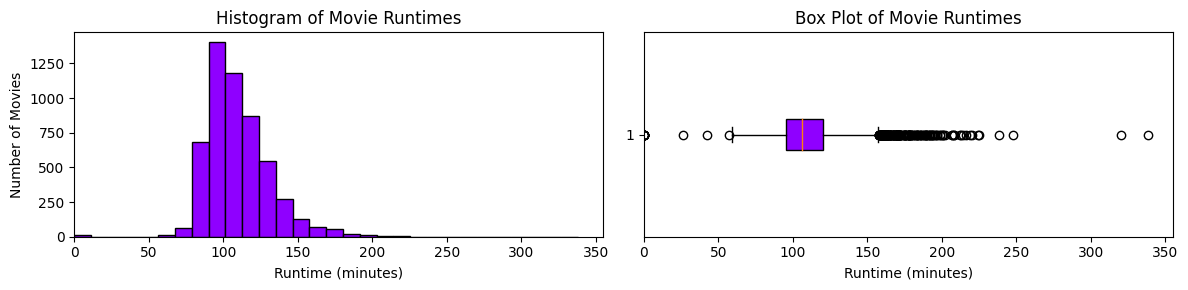

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (12,3))
plt.title("Distribution of Movie Runtime")

# plotting histogram
ax[0].hist(movies_dataframe['runtime'], bins=30, color='#8F00FF', edgecolor='black')

ax[0].set_xlabel('Runtime (minutes)')
ax[0].set_ylabel('Number of Movies')
ax[0].set_title('Histogram of Movie Runtimes')
ax[0].set_xlim(left=0)  # Ensure x-axis starts at 0
ax[0].set_ylim(bottom=0)  # Ensure y-axis starts at 0

# plotting box plot
ax[1].boxplot(movies_dataframe['runtime'], vert=False, patch_artist=True,
               boxprops=dict(facecolor='#8F00FF'))

ax[1].set_xlabel('Runtime (minutes)')
ax[1].set_title('Box Plot of Movie Runtimes')
ax[1].set_xlim(left=0)  # Ensure x-axis starts at 0

plt.tight_layout()
plt.show()

The histogram and box plot reveal that the majority of movies have a runtime ranging from 85 to 120 minutes.

1. Only two movies exceed a runtime of 300 minutes; they could be documentaries or web series.

2. The median runtime for movies sits around 100 minutes.

## Effect of Languages on Movie Production

In [ ]:
lan = movies_dataframe['original_language'].value_counts().reset_index()
lan.head(2)

,original_language,count
0,en,4789
1,hi,99


In [ ]:
# Creating a column under the name 'name' which contain the NaN values
lan['name'] = pd.Series(dtype = 'object')

In [ ]:
# Full name of the languages present in the 'original_language' column of 'lan; dataframe
languages = ['English', 'Hindi', 'French', 'Russian', 'Japanese', 'Spanish', 'Italian', 'Chinese', 'Tamil', 'Korean', 'German', 'Cantonese',
    'Malayalam', 'Danish', 'Telugu', 'Swedish', 'Portuguese', 'Dutch', 'Polish', 'Turkish', 'Romanian', 'Hebrew', 'Norwegian', 'Finnish',
    'Indonesian', 'Serbian', 'Hungarian','Thai', 'No Language', 'Urdu', 'Bambara', 'Norwegian Bokmål', 'Catalan', 'Vietnamese', 'Afrikaans',
    'Greek', 'Kannada', 'Icelandic', 'Persian', 'Marathi'
]


In [ ]:
# Assign language names to the 'name' column
lan['name'] = languages
lan.sort_values(by = 'count', ascending = False, inplace = True)


In [ ]:
lan.head()

,original_language,count,name
0,en,4789,English
1,hi,99,Hindi
2,fr,89,French
3,ru,68,Russian
4,ja,39,Japanese


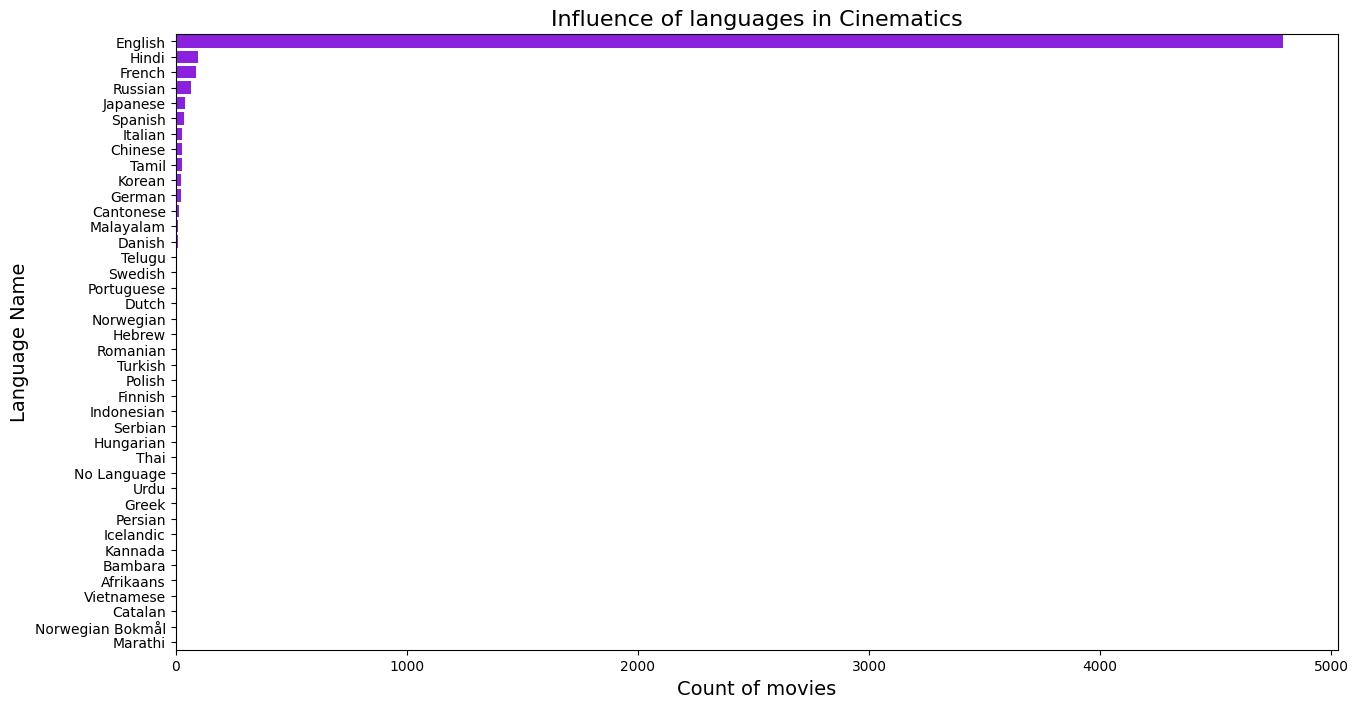

In [ ]:
# Create the barplot
plt.figure(figsize = (15,8))
fig1 = sns.barplot(data=lan, x='count', y='name', color='#8F00FF')

# Set the labels
fig1.set_xlabel('Count of movies', fontsize=14)
fig1.set_ylabel('Language Name', fontsize=14)

# Add the title
plt.title('Influence of languages in Cinematics', fontsize=16)

plt.show()

1. The graph clearly shows that English is the primary language for making movies, likely due to the global acceptance of the English language.

2. Hindi is the second most common language, followed by French.

3. Only 5-6 languages significantly contribute to movie production. For other languages, only one or two movies are made, so their bars are not visible on the graph